In [1]:
import os
import pandas as pd
import datetime
import backtrader as bt
from strategy import *
from dotenv import load_dotenv
import alpha_vantage as av
from alpha_vantage.alphavantage import AlphaVantage
from alpha_vantage.timeseries import TimeSeries as ts

In [2]:
load_dotenv()

True

In [3]:
# Setup AV API
av_api_key=os.getenv("ALPHAVANTAGE_API_KEY")
av_api='https://www.alphavantage.co/query?'

# Create time-series query
ts_query=ts(key=av_api_key,output_format='csv')

# Set query input variables
interval='1min'
period=60
outputsize='full'
symbol='TSLA'

In [4]:
# Get time-series minute data from AV
data_ts,meta_data_ts=ts_query.get_intraday(symbol=symbol,
                                           interval=interval,
                                           outputsize=outputsize,
)
# Create time-series DataFrame
ts_df=pd.DataFrame.from_dict(data_ts)
ts_df.drop(index=ts_df.index[0], axis=0, inplace=True)
ts_df.head()

,0,1,2,3,4,5
1,2021-06-11 20:00:00,610.3500,611.0000,610.3500,610.5000,2476
2,2021-06-11 19:59:00,610.4900,610.4900,610.4900,610.4900,788
3,2021-06-11 19:58:00,610.3500,610.3500,610.3500,610.3500,252
4,2021-06-11 19:57:00,610.2500,610.3500,610.2500,610.3100,835
5,2021-06-11 19:56:00,610.1000,610.2500,610.1000,610.2500,1985


In [5]:
# Output data for ticker to .csv file
ts_df.to_csv((f'{symbol}'+'_data.csv'),index=True)

## Run GoldenCross Strategy

position size: 0
2021-06-11, Buy 16 shares of stock at 610.13
2021-06-11, TSLA_data Order:   1	Type: Buy  	Status Accepted 	Size:   16.0000 Price:  610.1300 Position: 0
2021-06-11, Buy 16 shares of stock at 611.14
2021-06-11, TSLA_data Order:   2	Type: Buy  	Status Accepted 	Size:   16.0000 Price:  611.1400 Position: 0
2021-06-11, Buy 16 shares of stock at 610.31
2021-06-11, TSLA_data Order:   3	Type: Buy  	Status Accepted 	Size:   16.0000 Price:  610.3100 Position: 0
2021-06-11, Buy 16 shares of stock at 612.1
2021-06-11, TSLA_data Order:   4	Type: Buy  	Status Accepted 	Size:   16.0000 Price:  612.1000 Position: 0
2021-06-10, Buy 16 shares of stock at 611.75
2021-06-10, TSLA_data Order:   5	Type: Buy  	Status Accepted 	Size:   16.0000 Price:  611.7500 Position: 0
2021-06-10, Buy 16 shares of stock at 612.8
2021-06-10, TSLA_data Order:   6	Type: Buy  	Status Accepted 	Size:   16.0000 Price:  612.8000 Position: 0
2021-06-10, Buy 16 shares of stock at 611.2453
2021-06-10, TSLA_data Orde

<IPython.core.display.Javascript object>


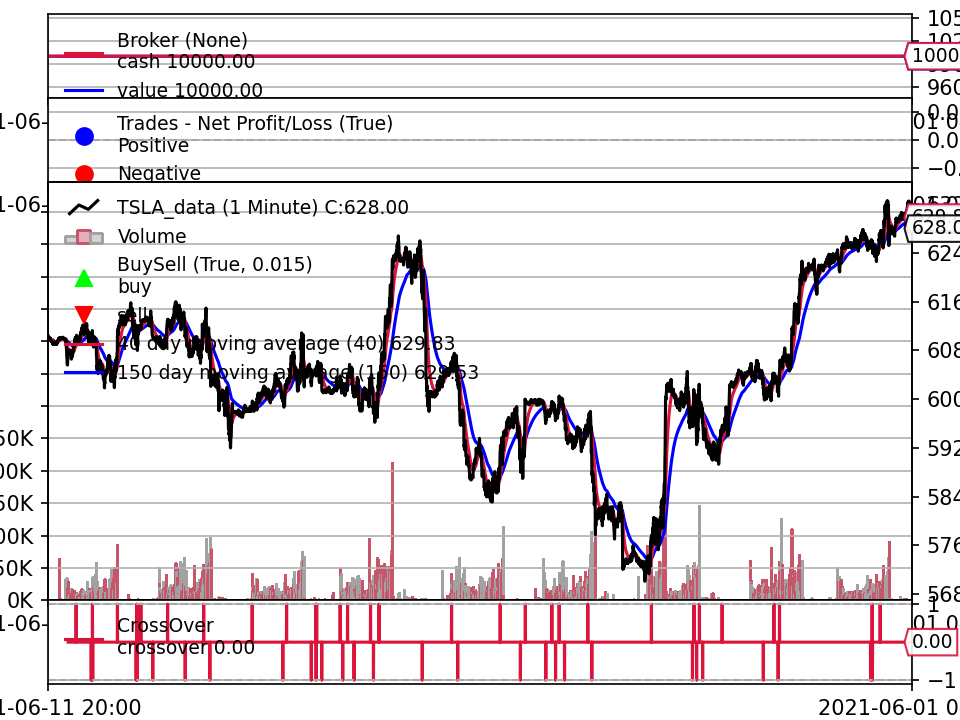

Starting Portfolio Value: 10000.000000
Final Portfolio Value: 10000.000000
PnL: 0.00


In [6]:
# Instantiate Cerebro engine:
cerebro = bt.Cerebro()

data = bt.feeds.GenericCSVData(
        dataname=f'{symbol}_data.csv',
        datetime=1,
        fromdate=datetime.datetime(2021, 6, 1),
        timeframe=bt.TimeFrame.Minutes,
        dtformat=('%Y-%m-%d %H:%M:%S'),
        open=2,
        high=3,
        low=4,
        close=5,
        volume=6,
        reverse=True)

cerebro.adddata(data)

# Add strategy to Cerebro:
cerebro.addstrategy(GoldCross)

# Save backtest data to a CSV file
cerebro.addwriter(bt.WriterFile, csv=True, out=f'{symbol}_gc_data.csv')

# Default position size:
cerebro.addsizer(bt.sizers.SizerFix, stake=3)

if __name__ == '__main__':
    # Run Cerebro Engine:
    start_portfolio_value = cerebro.broker.getvalue()

    cerebro.run()
    cerebro.plot()
    
    end_portfolio_value = cerebro.broker.getvalue()
    pnl = end_portfolio_value - start_portfolio_value
    
    print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    print(f'PnL: {pnl:.2f}')

In [7]:
cerebro.runstop()

## Run MACrossover strategy

2021-06-11 BUY CREATE 609.650000


<IPython.core.display.Javascript object>


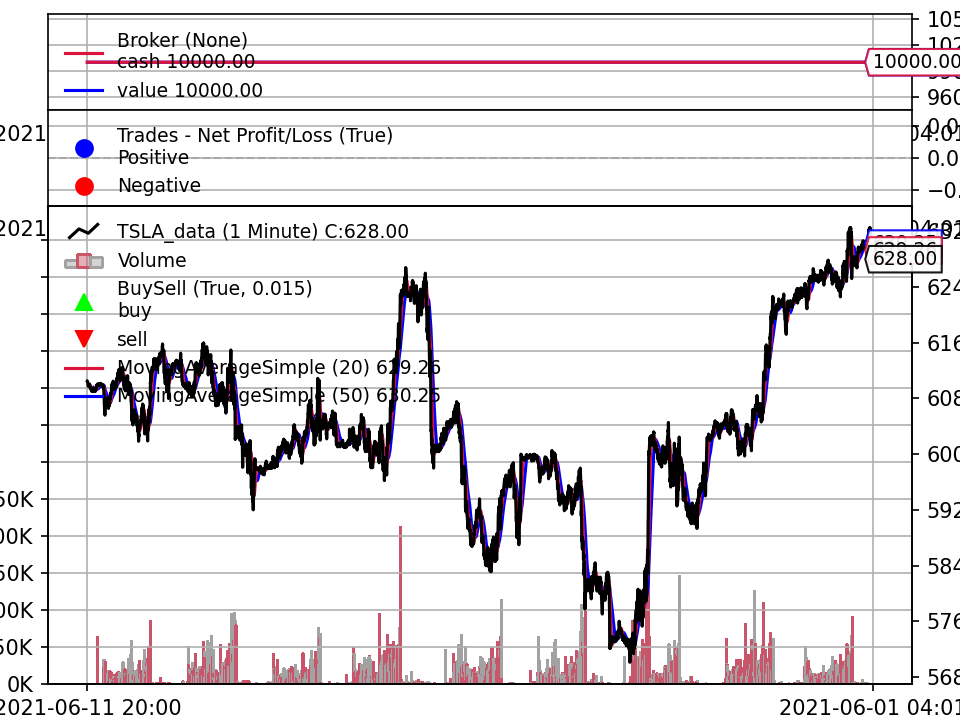

Starting Portfolio Value: 10000.000000
Final Portfolio Value: 10000.000000
PnL: 0.00


In [8]:
# Instantiate Cerebro engine:
cerebro = bt.Cerebro()

data = bt.feeds.GenericCSVData(
        dataname=f'{symbol}_data.csv',
        datetime=1,
        fromdate=datetime.datetime(2021, 6, 1),
        timeframe=bt.TimeFrame.Minutes,
        dtformat=('%Y-%m-%d %H:%M:%S'),
        open=2,
        high=3,
        low=4,
        close=5,
        volume=6,
        reverse=True)

cerebro.adddata(data)

# Add strategy to Cerebro:
cerebro.addstrategy(MAcrossover)

# Default position size:
cerebro.addsizer(bt.sizers.SizerFix, stake=3)

# Save backtest data to a CSV file
cerebro.addwriter(bt.WriterFile, csv=True, out=f'{symbol}_mac_data.csv')

if __name__ == '__main__':
    # Run Cerebro Engine:
    start_portfolio_value = cerebro.broker.getvalue()

    cerebro.run()
    cerebro.plot()
    
    end_portfolio_value = cerebro.broker.getvalue()
    pnl = end_portfolio_value - start_portfolio_value
    
    print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    print(f'PnL: {pnl:.2f}')